Below I am importing the necessary packages. Pandas is used to load in the data. Numpy is used for calculations. And matplotlib is used for the plotting.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

Below the code is creating two different lists. These lists hold the columns that we are selecting. There are two different list because the census bureau changed the way they named their columns after 2016. They are still grabbing the same data.

In [2]:
after_2016 = ['Label (Grouping)', "Total", "Total Margin of Error", "Percent", "Percent Margin of Error", "Male", "Male Margin of Error",
             "Male Percent", "Male Percent Margin of Error", "Female", "Female Margin of Error", "Female Percent", 
             "Female Percent Margin of Error"]
before_2016 = ['Label (Grouping)', "Total", "Total Margin of Error", "Male", "Male Margin of Error",
             "Female", "Female Margin of Error"]

Below is where we are actually loading in the census data. You can see that we are using the list above to grab the correct columns.

In [3]:
## Below I am loading in each year from its corresponding csv file
GR_inc_2022 = pd.read_csv('Demo_Code_Data\ACSST5Y2022_GR.csv',names = after_2016, skiprows=[0])
GR_inc_2021 = pd.read_csv('Demo_Code_Data\ACSST5Y2021_GR.csv',names = after_2016, skiprows=[0])
GR_inc_2020 = pd.read_csv('Demo_Code_Data\ACSST5Y2020_GR.csv',names = after_2016, skiprows=[0])
GR_inc_2019 = pd.read_csv('Demo_Code_Data\ACSST5Y2019_GR.csv',names = after_2016, skiprows=[0])
GR_inc_2018 = pd.read_csv('Demo_Code_Data\ACSST5Y2018_GR.csv',names = after_2016, skiprows=[0])
GR_inc_2017 = pd.read_csv('Demo_Code_Data\ACSST5Y2017_GR.csv',names = after_2016, skiprows=[0])
GR_inc_2016 = pd.read_csv('Demo_Code_Data\ACSST5Y2016_GR.csv',names = before_2016, skiprows=[0])
GR_inc_2015 = pd.read_csv('Demo_Code_Data\ACSST5Y2015_GR.csv',names = before_2016, skiprows=[0])
GR_inc_2014 = pd.read_csv('Demo_Code_Data\ACSST5Y2014_GR.csv',names = before_2016, skiprows=[0])
GR_inc_2013 = pd.read_csv('Demo_Code_Data\ACSST5Y2013_GR.csv',names = before_2016, skiprows=[0])
GR_inc_2012 = pd.read_csv('Demo_Code_Data\ACSST5Y2012_GR.csv',names = before_2016, skiprows=[0])
GR_inc_2011 = pd.read_csv('Demo_Code_Data\ACSST5Y2011_GR.csv',names = before_2016, skiprows=[0])
GR_inc_2010 = pd.read_csv('Demo_Code_Data\ACSST5Y2010_GR.csv',names = before_2016, skiprows=[0])

Below is a dictionary that we will use to rename the dataset columns after 2016. The data in the columns are the same, but since the census bureau used a different naming convention the different years have differing columns names. We will change column names for the years after 2016 to match the ones before 2016. This will help when we concatenate the different years into one data set.

In [4]:
col_names = {'Percent': 'Total','Percent Margin of Error': 'Total Margin of Error',
             'Male Percent': 'Male','Male Percent Margin of Error': 'Male Margin of Error','Female Percent': 'Female',
                            	'Female Percent Margin of Error': 'Female Margin of Error'}

Below is a ginormious function. The overview for this function is you input a city (or area) into the function and it will spit out three different datasets. The first dataset holds data about different salary ranges in a city. The second holds data about the median salary per education level. The third holds data about the median salary overall. Above we loaded in data for the city of Grand Rapids. To note this we named each file 'GR_inc_year'. The GR indicates that this data is for the city of grand rapids. In order for the function to understand that you want to clean the Grand Rapids data you will have to call the function and insert 'GR' as the city.

In [5]:
def clean_data(city):
    salary_range = []
    education_level = []
    median = []

    for year in range(2010, 2017):
        globals()[f"{city}_range_{year}"] = globals()[f"{city}_inc_{year}"][2:12] # Grabbing the rows with the salary ranges
        globals()[f"{city}_range_{year}"].loc[:,"Year"] = [year]*len(globals()[f"{city}_range_{year}"]) # Creating a year column
        salary_range.append(globals()[f"{city}_range_{year}"])

    for year in range(2017, 2023):
        # The line below grabs the data we want
        globals()[f"{city}_range_{year}"] = globals()[f"{city}_inc_{year}"][2:12][['Label (Grouping)','Percent','Percent Margin of Error','Male Percent',
                                                    'Male Percent Margin of Error','Female Percent','Female Percent Margin of Error']]
        globals()[f"{city}_range_{year}"].loc[:,"Year"] = [year]*len(globals()[f"{city}_range_{year}"]) # Adds a year column
        globals()[f"{city}_range_{year}"] = globals()[f"{city}_range_{year}"].rename(columns=col_names) # Renames the columns
        salary_range.append(globals()[f"{city}_range_{year}"])

    full_time_salary_ranges = pd.concat(salary_range[::-1],ignore_index=True)
    
    # Turning all the columns but 'Label (Grouping)' into floats
    full_time_salary_ranges.loc[:,'Total'] = full_time_salary_ranges.loc[:,'Total'].str.replace(',', '').str.rstrip('%').astype(float)
    full_time_salary_ranges.loc[:,'Male'] = full_time_salary_ranges.loc[:,'Male'].str.replace(',', '').str.rstrip('%').astype(float)
    full_time_salary_ranges.loc[:,'Female'] = full_time_salary_ranges.loc[:,'Female'].str.replace(',', '').str.rstrip('%').astype(float)

    full_time_salary_ranges.loc[:,'Total Margin of Error'] = full_time_salary_ranges.loc[:,'Total Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(float)/10
    full_time_salary_ranges.loc[:,'Male Margin of Error'] = full_time_salary_ranges.loc[:,'Male Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(float)/10
    full_time_salary_ranges.loc[:,'Female Margin of Error'] = full_time_salary_ranges.loc[:,'Female Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(float)/10

    # Removes the leading white space in the 'Label (Grouping) column
    full_time_salary_ranges.loc[:,'Label (Grouping)'] = full_time_salary_ranges.loc[:,'Label (Grouping)'].str.lstrip()

    #Adds a rank for the salary range data frame
    full_time_salary_ranges['rank'] = [0]*len(full_time_salary_ranges)
    for i in range(len(full_time_salary_ranges)):
        if full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$1 to $9,999 or loss":
            full_time_salary_ranges.loc[i,"rank"] = 1
        elif full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$10,000 to $14,999":
            full_time_salary_ranges.loc[i,"rank"] = 2
        elif full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$15,000 to $24,999":
            full_time_salary_ranges.loc[i,"rank"] = 3
        elif full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$25,000 to $34,999":
            full_time_salary_ranges.loc[i,"rank"] = 4
        elif full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$35,000 to $49,999":
            full_time_salary_ranges.loc[i,"rank"] = 5
        elif full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$50,000 to $64,999":
            full_time_salary_ranges.loc[i,"rank"] = 6
        elif full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$65,000 to $74,999":
            full_time_salary_ranges.loc[i,"rank"] = 7
        elif full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$75,000 to $99,999":
            full_time_salary_ranges.loc[i,"rank"] = 8
        elif full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$100,000 or more":
            full_time_salary_ranges.loc[i,"rank"] = 9

    #Renaming the columns to hold the city 
    full_time_salary_ranges = full_time_salary_ranges.rename(columns={'Label (Grouping)': f'{city} Label (Grouping)', 'Total': f'{city} Total', 
                                            'Total Margin of Error': f'{city} Total Margin of Error', 'Male': f'{city} Male', 
                                            'Male Margin of Error': f'{city} Male Margin of Error', 'Female': f'{city} Female', 
                                            'Female Margin of Error': f'{city} Female Margin of Error', 'Year': f'{city} Year', 'rank': F'{city} Rank'})
    
    # Looping through the 2010-2016 years
    for year in range(2010, 2017):
        # Creating a dataframe and grabbing the data with the estimated median salary for each education level
        globals()[f"{city}_education_{year}"] = globals()[f"{city}_inc_{year}"][15:21]
        # Adding a year column
        globals()[f"{city}_education_{year}"].loc[:,"Year"] = [year]*len(globals()[f"{city}_education_{year}"])
        education_level.append(globals()[f"{city}_education_{year}"])

    for year in range(2017, 2023):
        # Again creating a dataframe and grabbing the data with the estimated median salary for each education level
        # Only this time we are making sure to grab only the columns that align with the earlier years
        globals()[f"{city}_education_{year}"] = globals()[f"{city}_inc_{year}"][15:21][['Label (Grouping)','Total','Total Margin of Error','Male',
                                                    'Male Margin of Error','Female','Female Margin of Error']]
        # Adding a year column
        globals()[f"{city}_education_{year}"].loc[:,"Year"] = [year]*len(globals()[f"{city}_education_{year}"])
        education_level.append(globals()[f"{city}_education_{year}"])

    # Concatenating the education levels for each year into one data frame
    median_salary_per_education = pd.concat(education_level[::-1],ignore_index=True)

    # Turning all the columns but 'Label (Grouping)' into floats
    median_salary_per_education.loc[:,'Total'] = median_salary_per_education.loc[:,'Total'].str.replace(',', '').astype(int)
    median_salary_per_education.loc[:,'Male'] = median_salary_per_education.loc[:,'Male'].str.replace(',', '').astype(int)
    median_salary_per_education.loc[:,'Female'] = median_salary_per_education.loc[:,'Female'].str.replace(',', '').astype(int)

    median_salary_per_education.loc[:,'Total Margin of Error'] = median_salary_per_education.loc[:,'Total Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)
    median_salary_per_education.loc[:,'Male Margin of Error'] = median_salary_per_education.loc[:,'Male Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)
    median_salary_per_education.loc[:,'Female Margin of Error'] = median_salary_per_education.loc[:,'Female Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)

    # Removes the leading white space in the 'Label (Grouping) column
    median_salary_per_education['Label (Grouping)'] = median_salary_per_education['Label (Grouping)'].str.strip()

    # Renaming the columns to hold the city
    median_salary_per_education = median_salary_per_education.rename(columns={'Label (Grouping)': f'{city} Label (Grouping)', 'Total': f'{city} Total', 
                                            'Total Margin of Error': f'{city} Total Margin of Error', 'Male': f'{city} Male', 
                                            'Male Margin of Error': f'{city} Male Margin of Error', 'Female': f'{city} Female', 
                                            'Female Margin of Error': f'{city} Female Margin of Error', 'Year': f'{city} Year'})

    for year in range(2010, 2017):
        # Grabbing rows with estimated median salary
        globals()[f"{city}_median_{year}"] = globals()[f"{city}_inc_{year}"][0:2]
        # Adding a year column
        globals()[f"{city}_median_{year}"].loc[:,"Year"] = [year]*len(globals()[f"{city}_median_{year}"])
        median.append(globals()[f"{city}_median_{year}"])

    
    for year in range(2017, 2023):
        # Grabbing rows with estimated median salary
        globals()[f"{city}_median_{year}"] = globals()[f"{city}_inc_{year}"][0:2][['Label (Grouping)','Total','Total Margin of Error','Male',
                                                    'Male Margin of Error','Female','Female Margin of Error']]
        # Adding a year column
        globals()[f"{city}_median_{year}"].loc[:,"Year"] = [year]*len(globals()[f"{city}_median_{year}"])
        median.append(globals()[f"{city}_median_{year}"])
    
    # Combing the median salary data into one data frame
    median_salary = pd.concat(median[::-1],ignore_index=True)
    
    # Turning all the columns but 'Label (Grouping)' into floats
    median_salary.loc[:,'Total'] = median_salary.loc[:,'Total'].str.replace(',', '').astype(int)
    median_salary.loc[:,'Male'] = median_salary.loc[:,'Male'].str.replace(',', '').astype(int)
    median_salary.loc[:,'Female'] = median_salary.loc[:,'Female'].str.replace(',', '').astype(int)

    median_salary.loc[:,'Total Margin of Error'] = median_salary.loc[:,'Total Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)
    median_salary.loc[:,'Male Margin of Error'] = median_salary.loc[:,'Male Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)
    median_salary.loc[:,'Female Margin of Error'] = median_salary.loc[:,'Female Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)

    # Removes the leading white space in the 'Label (Grouping) column
    median_salary['Label (Grouping)'] = median_salary['Label (Grouping)'].str.strip()

    median_salary = median_salary.rename(columns={'Label (Grouping)': f'{city} Label (Grouping)', 'Total': f'{city} Total', 'Total Margin of Error': f'{city} Total Margin of Error',
                                            'Male': f'{city} Male', 'Male Margin of Error': f'{city} Male Margin of Error', 'Female': f'{city} Female', 
                                            'Female Margin of Error': f'{city} Female Margin of Error', 'Year': f'{city} Year'})


    return(full_time_salary_ranges, median_salary_per_education, median_salary)

Below we are calling the function. Like I said earlier, we are inserting "GR" into the function so it knows to use the Grand Rapids data. 

In [6]:
GR_salary_ranges, GR_education, GR_median = clean_data('GR')

Below we are going to print out each of the datasets that the functions created. This is going to give us a better idea of the data we are working with. The first one we are looking at is data about different salary ranges in Grand Rapids. The 'Label (Grouping)' columns identifies what category we are looking at. For this data frame there are 10 different categories. 'FULL-TIME, YEAR-ROUND WORKERS WITH EARNINGS' Is the population of full time workers. The rest of the categories are different salary ranges. For each of the salary ranges it holds the percentage of the full time population that is in that salary category. The column breaks it up into to total, male, and female. The total is the total population. Then it takes the total population and breaks it up into Male and Female. It also has the margin of error seeing as this is estimated data from polls. The last two columns are year and rank. The year is straight forwards. It is just the year that the data is for. The rank is for when we export this data to Power BI. Power BI doesn't know how to order categorical data, so putting a number on the label will be helpful. 

In [7]:
GR_salary_ranges

,GR Label (Grouping),GR Total,GR Total Margin of Error,GR Male,GR Male Margin of Error,GR Female,GR Female Margin of Error,GR Year,GR Rank
0,"FULL-TIME, YEAR-ROUND WORKERS WITH EARNINGS",69603.0,160.1,38535.0,118.1,31068.0,118.9,2022,0
1,"$1 to $9,999 or loss",2.0,0.6,1.7,0.6,2.3,1.1,2022,1
2,"$10,000 to $14,999",1.9,0.6,1.5,0.7,2.3,0.9,2022,2
3,"$15,000 to $24,999",8.0,1.0,8.0,1.3,7.9,1.3,2022,3
4,"$25,000 to $34,999",13.5,1.1,11.9,1.1,15.5,1.7,2022,4
...,...,...,...,...,...,...,...,...,...
125,"$35,000 to $49,999",23.5,1.2,22.3,1.5,25.1,2.2,2010,5
126,"$50,000 to $64,999",13.6,1.0,15.2,1.5,11.7,1.5,2010,6
127,"$65,000 to $74,999",4.5,0.5,5.2,0.8,3.6,0.6,2010,7
128,"$75,000 to $99,999",5.1,0.6,5.9,0.9,4.1,0.9,2010,8


The below data frame has a very similar set up as the first. All of the columns are the same as the above. The main difference here is the 'Label (Grouping)' columns holds different data. The different categories are 'Population 25 years and over with earnings' and different education levels. The Population 25 years and over holds the number of working population. The other categories are different education levels. Each of theses education levels holds a median salary for that level. For example the label grouping 'Less than high school graduate' in the 'GR total' column holds the median salary estimate for someone who has less than a high school diploma for the entire population. Again the columns break it down into total, male and female population. 

In [8]:
GR_education

,GR Label (Grouping),GR Total,GR Total Margin of Error,GR Male,GR Male Margin of Error,GR Female,GR Female Margin of Error,GR Year
0,Population 25 years and over with earnings,42895,1124,47268,1483,38428,1264,2022
1,Less than high school graduate,26823,3708,33058,3779,21295,3492,2022
2,High school graduate (includes equivalency),33742,2335,38888,2836,24740,4188,2022
3,Some college or associate's degree,37495,1783,43033,2508,31823,2405,2022
4,Bachelor's degree,54028,3139,61534,4341,48985,2053,2022
...,...,...,...,...,...,...,...,...
73,Less than high school graduate,16100,1075,17172,1193,13284,1845,2010
74,High school graduate (includes equivalency),23011,1277,25795,1214,19101,2249,2010
75,Some college or associate's degree,27329,1162,31427,1021,24140,1586,2010
76,Bachelor's degree,38416,1786,45934,1880,33036,2006,2010


The below data frame has a very similar set up as the first. All of the columns are the same as the above. The main difference here is the 'Label (Grouping)' columns holds different data. The different categories are 'Population 16 years and over with earnings' and 'Median earnings'. The Population 16 years and over holds the number of working population. The 'Median earnings' category holds the estimated median salary. Again the columns break it down into total, male and female population. 

In [9]:
GR_median

,GR Label (Grouping),GR Total,GR Total Margin of Error,GR Male,GR Male Margin of Error,GR Female,GR Female Margin of Error,GR Year
0,Population 16 years and over with earnings,116002,1921,59669,1321,56333,1334,2022
1,Median earnings (dollars),35865,797,40405,1133,31363,1440,2022
2,Population 16 years and over with earnings,115173,1612,59670,1413,55503,1192,2021
3,Median earnings (dollars),31846,792,35421,1122,27511,1043,2021
4,Population 16 years and over with earnings,115411,1619,59950,1218,55461,1299,2020
5,Median earnings (dollars),29013,1039,32094,1034,25070,1033,2020
6,Population 16 years and over with earnings,114798,1184,59736,1179,55062,1061,2019
7,Median earnings (dollars),27482,631,30580,528,24431,961,2019
8,Population 16 years and over with earnings,112169,1253,57866,1245,54303,978,2018
9,Median earnings (dollars),26368,643,28988,1103,23325,884,2018


Now we are going to make some simple plots from each of the datasets that we created. First we are going to filter out each of the things that we want to plot. We have to do this because the labels are in a single column, so we are grabbing just the labels we want to plot.

In [10]:
# Grabbing the population of full time year round workers
full_time = GR_salary_ranges[GR_salary_ranges['GR Label (Grouping)']=='FULL-TIME, YEAR-ROUND WORKERS WITH EARNINGS']

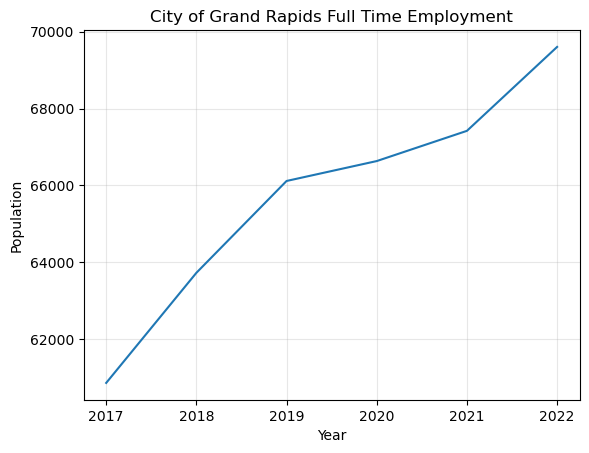

In [11]:
plt.plot(full_time['GR Year'],full_time['GR Total'])

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('City of Grand Rapids Full Time Employment')
plt.grid(alpha=.3)

Below we are grabbing each of the education levels and storing them in their own variable. Again, this is going to help when graphing each one.

In [12]:
less_than_high_school = GR_education[GR_education['GR Label (Grouping)']=='Less than high school graduate']
high_school_graduate = GR_education[GR_education['GR Label (Grouping)']=='High school graduate (includes equivalency)']
some_college = GR_education[GR_education['GR Label (Grouping)']=="Some college or associate's degree"]
bachelor = GR_education[GR_education['GR Label (Grouping)']=="Bachelor's degree"]
graduate = GR_education[GR_education['GR Label (Grouping)']=='Graduate or professional degree']

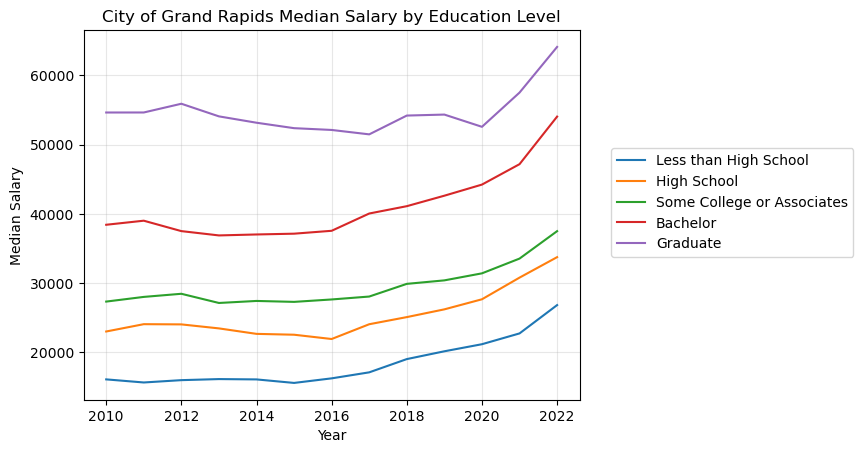

In [13]:
plt.plot(less_than_high_school['GR Year'],less_than_high_school['GR Total'],label='Less than High School')
plt.plot(high_school_graduate['GR Year'],high_school_graduate['GR Total'],label='High School')
plt.plot(some_college['GR Year'],some_college['GR Total'],label='Some College or Associates')
plt.plot(bachelor['GR Year'],bachelor['GR Total'],label='Bachelor')
plt.plot(graduate['GR Year'],graduate['GR Total'],label='Graduate')

plt.xlabel('Year')
plt.ylabel('Median Salary')
plt.title('City of Grand Rapids Median Salary by Education Level')
plt.legend(bbox_to_anchor=(1.05, .7))
plt.grid(alpha=.3)

Finally we are grabbing the median salary for the City of Grand Rapids.

In [14]:
median = GR_median[GR_median['GR Label (Grouping)']=='Median earnings (dollars)']

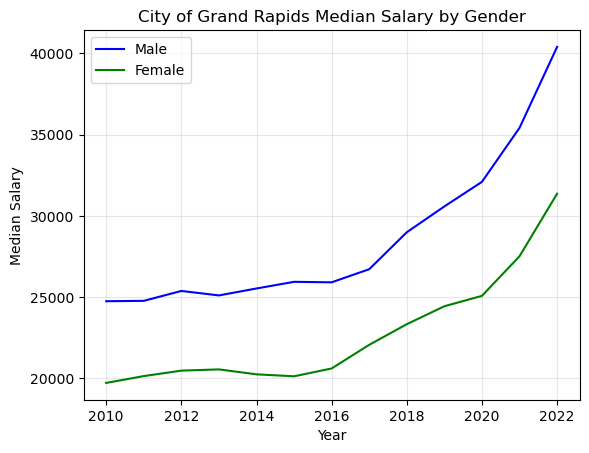

In [15]:
plt.plot(median['GR Year'],median['GR Male'],color='blue',label='Male')
plt.plot(median['GR Year'],median['GR Female'],color='green',label='Female')

plt.xlabel('Year')
plt.ylabel('Median Salary')
plt.title('City of Grand Rapids Median Salary by Gender')
plt.legend()
plt.grid(alpha=.3)